In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

In [5]:
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("E:/dataset/analysis/3.12.+Example.csv")
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


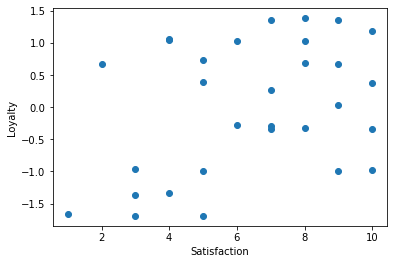

In [7]:
plt.scatter(df.Satisfaction,df.Loyalty)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [8]:
x= df.copy()

In [34]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.inertia_

74.51511402714932

In [10]:
clusters = x.copy()

In [11]:
clusters['cluster_pred']= kmeans.predict(x)

In [35]:
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


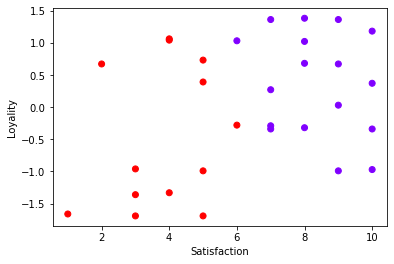

In [13]:
plt.scatter(clusters.Satisfaction,clusters.Loyalty, c=clusters.cluster_pred, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

In [14]:
# Here satisfaction is given more weight by kmeans bcz it has large numbers compared to loyality. So in order to give equal weights to both
# we need to standardise the data

In [15]:
from sklearn import preprocessing

In [16]:
x_scaled = preprocessing.scale(x)


In [17]:
# to find best fit of clusters we will use Elbow Method

In [18]:
# WCSS(within cluster sum of squares):
# It gives sum of square of dist of each data point in all clusters to their respective centroids.

In [19]:
wcss = []

In [20]:
for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.4484993816158225,
 4.352037765292862,
 3.8342434382627637]

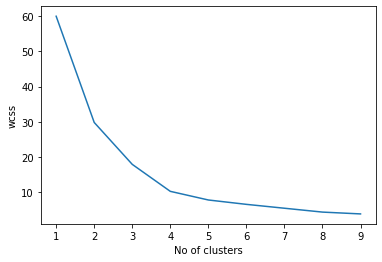

In [21]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred']= kmeans_new.predict(x_scaled)

In [36]:
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,2


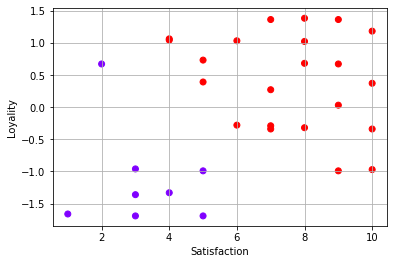

In [24]:
plt.scatter(clusters_new.Satisfaction,clusters_new.Loyalty, c=clusters_new.cluster_pred, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.grid()
plt.show()

In [25]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred']= kmeans_new.predict(x_scaled)

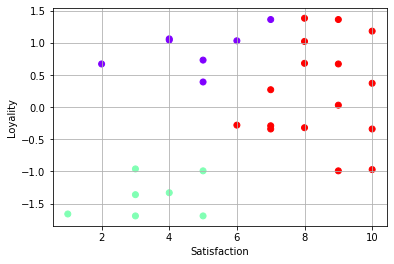

In [26]:
plt.scatter(clusters_new.Satisfaction,clusters_new.Loyalty, c=clusters_new.cluster_pred, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.grid()
plt.show()

In [27]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred']= kmeans_new.predict(x_scaled)

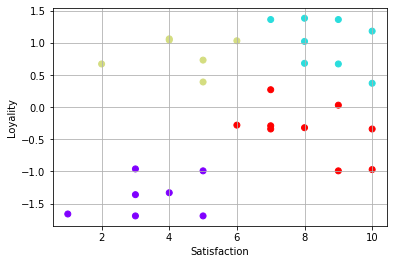

In [28]:
plt.scatter(clusters_new.Satisfaction,clusters_new.Loyalty, c=clusters_new.cluster_pred, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.grid()
plt.show()

In [29]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred']= kmeans_new.predict(x_scaled)

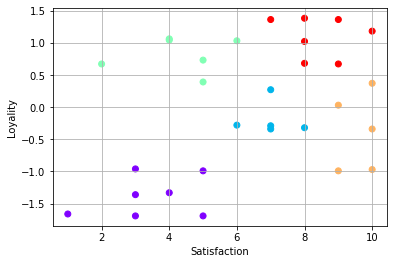

In [30]:
plt.scatter(clusters_new.Satisfaction,clusters_new.Loyalty, c=clusters_new.cluster_pred, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.grid()
plt.show()

In [31]:
# Solution with 4 clusters is best of all as it shows the best and worst customers. 